In [10]:
import pandas as pd
import numpy as np
from datetime import datetime
from pytz import UTC
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("../../db/data/merge/secondary/logs_.csv", index_col=0)
df.index = pd.to_datetime(df.index)
datetime(2022, 7, 1, 0, 0, 0, 0, UTC)

df = df.loc[datetime(2010, 6, 1, 0, 0, 0, 0, UTC):datetime(2022, 7, 1, 0, 0, 0, 0, UTC)]
display(df.head(1), df.tail(1))
df.shape


,AUD_CAD,AUD_CHF,AUD_JPY,AUD_NZD,AUD_USD,CAD_CHF,CAD_JPY,CHF_JPY,EUR_AUD,EUR_CAD,...,GBP_JPY,GBP_NZD,GBP_USD,NZD_CAD,NZD_CHF,NZD_JPY,NZD_USD,USD_CAD,USD_CHF,USD_JPY
2010-06-01 00:00:00+00:00,-0.195535,-0.431203,-0.701336,-0.140981,-0.470019,-0.252915,-0.504554,-0.271715,0.354467,0.168679,...,-0.372762,0.185407,-0.157289,-0.047979,-0.305857,-0.55999,-0.335956,0.293033,0.037194,-0.217444


,AUD_CAD,AUD_CHF,AUD_JPY,AUD_NZD,AUD_USD,CAD_CHF,CAD_JPY,CHF_JPY,EUR_AUD,EUR_CAD,...,GBP_JPY,GBP_NZD,GBP_USD,NZD_CAD,NZD_CHF,NZD_JPY,NZD_USD,USD_CAD,USD_CHF,USD_JPY
2022-07-01 00:00:00+00:00,-0.05858,-0.048583,0.019215,0.010852,-0.092832,0.009434,0.079595,0.068199,0.036857,-0.023727,...,0.065983,0.070777,-0.053466,-0.080965,-0.077221,-0.004721,-0.121889,0.041164,0.052337,0.119222


(74593, 28)

In [5]:
SYMBOLS = [ 'AUD_CAD', 'AUD_CHF', 'AUD_JPY', 'AUD_NZD', 'AUD_USD', 
            'CAD_CHF', 'CAD_JPY', 'CHF_JPY', 'EUR_AUD', 'EUR_CAD', 
            'EUR_CHF', 'EUR_GBP', 'EUR_JPY', 'EUR_NZD', 'EUR_USD', 
            'GBP_AUD', 'GBP_CAD', 'GBP_CHF', 'GBP_JPY', 'GBP_NZD', 
            'GBP_USD', 'NZD_CAD', 'NZD_CHF', 'NZD_JPY', 'NZD_USD', 
            'USD_CAD', 'USD_CHF', 'USD_JPY'
          ]


In [6]:
def mean_prediction(df, rate=24):
    data = pd.DataFrame([])
    for sym in SYMBOLS:
        data[f'{sym}_pred_mean'] = df[sym].rolling(rate).mean()
    return data
        


In [15]:
def random_prediction(df):
    data = pd.DataFrame([])
    
    for sym in SYMBOLS:
        data[f'{sym}_pred_random']=pd.DataFrame(np.random.uniform(low=-0.8,high=0.8,size=(df.shape[0],1)))
    return data

In [32]:
one = random_prediction(df)
two = mean_prediction(df)
two

,AUD_CAD_pred_mean,AUD_CHF_pred_mean,AUD_JPY_pred_mean,AUD_NZD_pred_mean,AUD_USD_pred_mean,CAD_CHF_pred_mean,CAD_JPY_pred_mean,CHF_JPY_pred_mean,EUR_AUD_pred_mean,EUR_CAD_pred_mean,...,GBP_JPY_pred_mean,GBP_NZD_pred_mean,GBP_USD_pred_mean,NZD_CAD_pred_mean,NZD_CHF_pred_mean,NZD_JPY_pred_mean,NZD_USD_pred_mean,USD_CAD_pred_mean,USD_CHF_pred_mean,USD_JPY_pred_mean
2010-06-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-01 01:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-01 02:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-01 03:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-01 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30 20:00:00+00:00,0.006474,0.014114,-0.009765,0.001847,0.016264,0.005452,-0.019866,-0.024633,0.003651,0.010634,...,-0.006975,0.002052,0.018103,0.009079,0.016659,-0.008932,0.016176,-0.006274,-1.090762e-03,-0.025426
2022-06-30 21:00:00+00:00,0.008587,0.014815,-0.007723,-0.001280,0.016023,0.007028,-0.015647,-0.025189,-0.000274,0.008625,...,-0.004533,0.003485,0.017939,0.011464,0.017432,-0.008345,0.014773,-0.006823,9.532302e-08,-0.023743
2022-06-30 22:00:00+00:00,0.005350,0.011018,-0.012120,0.002752,0.011124,0.006297,-0.017178,-0.025889,0.002141,0.007053,...,-0.008491,0.008424,0.014205,0.004200,0.009102,-0.016892,0.006083,-0.005240,1.003896e-03,-0.023591
2022-06-30 23:00:00+00:00,0.008782,0.015841,-0.009898,-0.000225,0.013547,0.007478,-0.018268,-0.028147,-0.000604,0.007764,...,-0.012517,-0.000704,0.010432,0.010586,0.016740,-0.011729,0.011433,-0.004238,3.012254e-03,-0.023762


In [38]:
def condition(x):
    if x>0:
        return 1
    elif x<0:
        return -1
    else:
        return 0

for sym in two.columns:
    two[sym] = two[sym].map( lambda x: condition(x) )

# two.reset_index(inplace=True, drop=True)

display(one.shape, two.shape)


(74593, 28)

(74593, 28)

TypeError: scatter() missing 1 required positional argument: 'y'

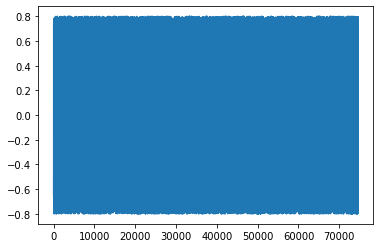

In [36]:
plt.plot(one["AUD_CAD_pred_random"])
plt.plot(two["AUD_CAD_pred_mean"])
